In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [6]:
read_data = pd.read_csv('/home/srujan/Downloads/world-development-indicators/Indicators.csv')
data_shape = np.shape(read_data)
print(data_shape)

(5656458, 6)


In [7]:
read_data.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


In [8]:
#get unique countries
countries = read_data['CountryName'].unique().tolist()
indicators = read_data['IndicatorName'].unique().tolist()

In [9]:
# choosing years
years = [2009, 2010, 2011, 2012]

In [10]:
type(countries)
empty_list = []
#for i in countries:
 #   if 'India' == i:
  #      empty_list = 'India'
   #        print(empty_list)
for idx, word in enumerate(countries):
    
    print(f"{idx}: {word}")        

0: Arab World
1: Caribbean small states
2: Central Europe and the Baltics
3: East Asia & Pacific (all income levels)
4: East Asia & Pacific (developing only)
5: Euro area
6: Europe & Central Asia (all income levels)
7: Europe & Central Asia (developing only)
8: European Union
9: Fragile and conflict affected situations
10: Heavily indebted poor countries (HIPC)
11: High income
12: High income: nonOECD
13: High income: OECD
14: Latin America & Caribbean (all income levels)
15: Latin America & Caribbean (developing only)
16: Least developed countries: UN classification
17: Low & middle income
18: Low income
19: Lower middle income
20: Middle East & North Africa (all income levels)
21: Middle East & North Africa (developing only)
22: Middle income
23: North America
24: OECD members
25: Other small states
26: Pacific island small states
27: Small states
28: South Asia
29: Sub-Saharan Africa (all income levels)
30: Sub-Saharan Africa (developing only)
31: Upper middle income
32: World
33: A

In [159]:
countries[119:122]

['India', 'Indonesia', 'Iran, Islamic Rep.']

In [144]:
type()

list

In [142]:
empty_list

'India'

In [145]:
len(empty_list)

5

In [17]:
# pick one indicator randomly
indicatorFilter = random.sample(indicators, 1)
type(indicatorFilter)
indicatorFilter

['Primary income payments (BoP, current US$)']

In [18]:
c1 = 'India'
mask1 = read_data['CountryName'].str.contains(c1)
c2 = 'United States'
mask2 = read_data['CountryName'].str.contains(c2)



In [19]:
stage1 = read_data[mask1]

In [20]:
stage1.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11561,India,IND,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,103.938000
11562,India,IND,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,76.559538
11563,India,IND,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,5.403730
11564,India,IND,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,71.155808
11565,India,IND,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,42.561131


In [217]:
stage1['CountryName'].iloc[0]

'India'

In [21]:
stage2 = read_data[mask2]


In [22]:
stage2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22220,United States,USA,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,84.987200
22221,United States,USA,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,66.524844
22222,United States,USA,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,15.230264
22223,United States,USA,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,51.294580
22224,United States,USA,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,1960,1.261261


In [23]:
stage2['CountryName'].iloc[0]

'United States'

In [24]:
con_name = read_data['CountryName'].unique().tolist()

In [25]:
type(con_name)

list

In [26]:
e_list = []
for con in con_name:
    if ((con == 'India') or (con == 'United States')):
        e_list.append(con)
print(e_list)


['India', 'United States']


In [12]:
e_list

['India', 'United States']

In [27]:
fm = (read_data['CountryName'] == e_list[0]) & (read_data['IndicatorName'].isin(indicatorFilter)) & (read_data['Year'].isin(years))


In [28]:
country1_data11 = read_data.loc[fm]

In [29]:
country1_data11.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4747133,India,IND,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,2009,2.127174e+10
4929974,India,IND,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,2010,2.556305e+10
5111752,India,IND,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,2011,2.619054e+10
5287423,India,IND,"Primary income payments (BoP, current US$)",BM.GSR.FCTY.CD,2012,3.074186e+10


In [31]:
filteredData1 = []
filteredData2 = []

In [42]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years.
# brings up the discussion of missing data/ missing fields
# until we find full data

while(len(filteredData1) < len(years)-1):
    # pick new indicator
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = e_list
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (read_data['CountryName'] == countryFilter[0]) & (read_data['IndicatorName'].isin(indicatorsFilter)) & (read_data['Year'].isin(years))
    # which rows have this condition to be true?
    filteredData1 = read_data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]

    # need to print this only when our while condition is true
    if(len(filteredData1) < len(years)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


In [43]:
indicatorsFilter

['Household final consumption expenditure (constant 2005 US$)']

In [41]:
len(indicatorFilter)

1

In [44]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (read_data['CountryName'] == countryFilter[1]) & (read_data['IndicatorName'].isin(indicatorsFilter)) & (read_data['Year'].isin(years))
    filteredData2 = read_data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [45]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [46]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [47]:
filteredData1

,CountryName,IndicatorName,Year,Value
4746724,India,Household final consumption expenditure (const...,2009,6.640700e+11
4929540,India,Household final consumption expenditure (const...,2010,7.217341e+11
5111341,India,Household final consumption expenditure (const...,2011,7.885152e+11
5287017,India,Household final consumption expenditure (const...,2012,8.318759e+11


In [48]:
filteredData2

,CountryName,IndicatorName,Year,Value
4831572,United States,Household final consumption expenditure (const...,2009,9.084879e+12
5018290,United States,Household final consumption expenditure (const...,2010,9.259577e+12
5194967,United States,Household final consumption expenditure (const...,2011,9.469129e+12
5370111,United States,Household final consumption expenditure (const...,2012,9.607328e+12


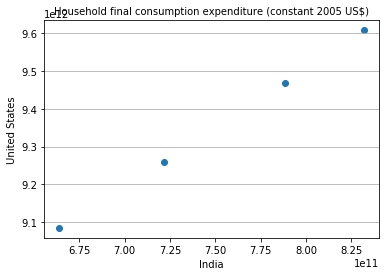

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

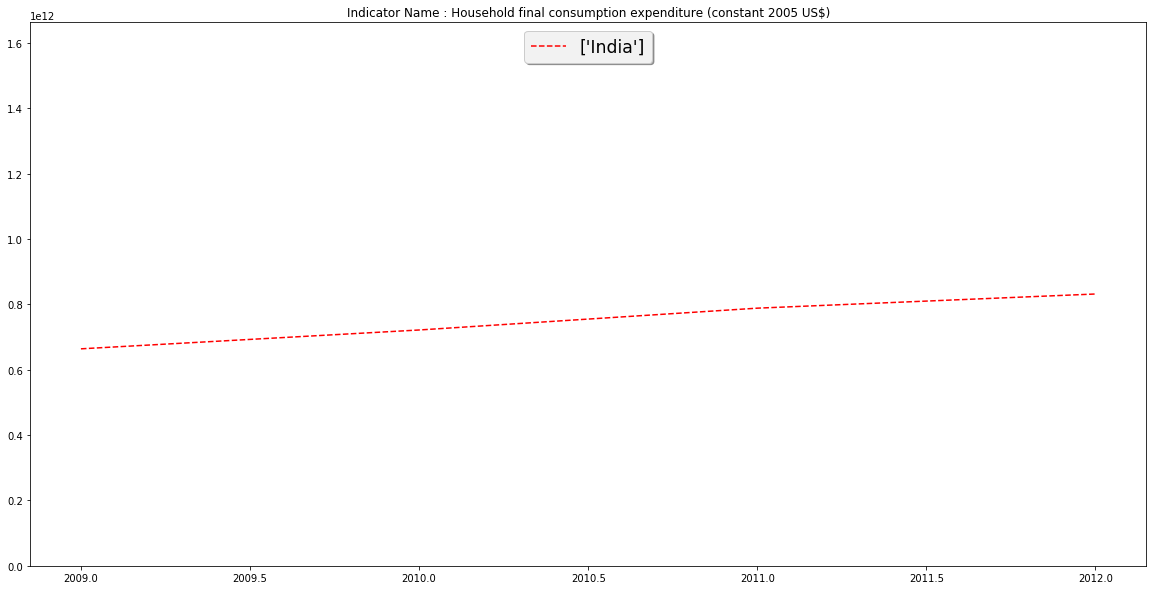

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

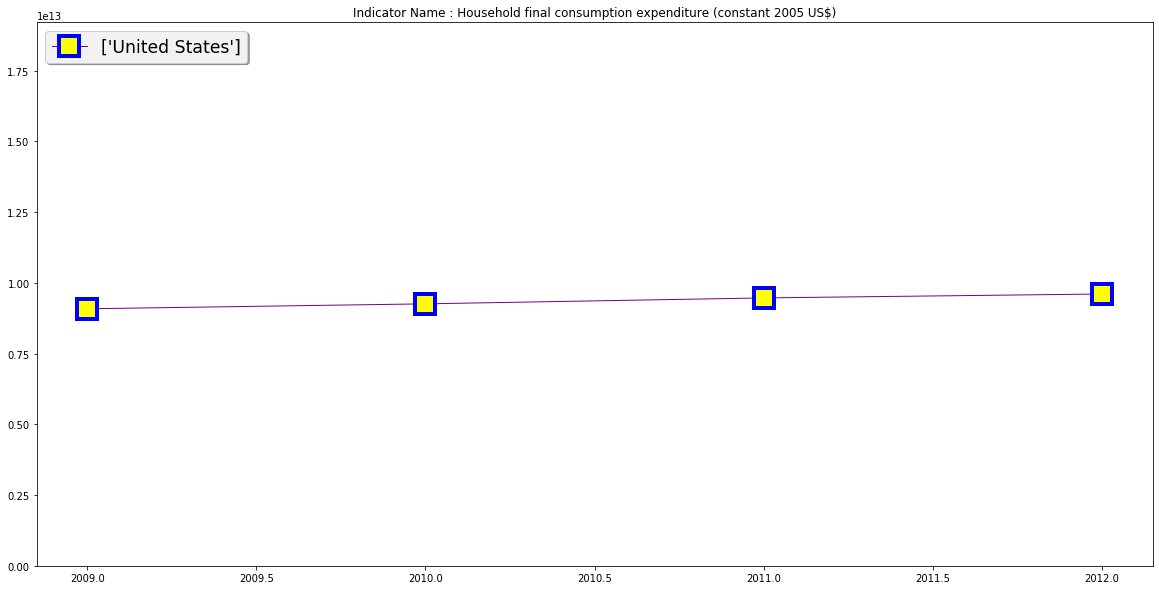

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()